In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


df = pd.read_csv("/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/figures/figure_3/panelb_motif/validation_combined.csv", sep="\t")
# drop nas
# count nas
df

,chr,start,end,count,label,cell_line,motif_sequence,motif_score,motif_start,motif_end,strand
0,chr1,10007,11396,7,1,22Rv1,GGGCACTACAGGACC,2.120,11184,11199,+
1,chr1,199206,200400,2,1,22Rv1,CAGAGCAGAAAGCAC,4.410,200120,200135,-
2,chr1,789670,791610,2,1,22Rv1,CGGAACGCAATGGAA,3.277,789899,789914,+
3,chr1,814899,815787,10,1,22Rv1,TAGAACAAGGTGGTT,8.740,815678,815693,+
4,chr1,940130,942508,4,1,22Rv1,GGGGAACTGACCACA,5.883,941044,941059,-
...,...,...,...,...,...,...,...,...,...,...,...
93674,chrY,26562941,26563633,0,0,22Rv1,TTTCCCAAGCCTTGG,8.480,26563482,26563497,-
93675,chrY,26643332,26645393,0,0,22Rv1,TGGAACAGAGTGGAT,10.280,26645043,26645058,+
93676,chrY,26653380,26654970,0,0,22Rv1,TGGAACGGAATGGAA,3.180,26654311,26654326,+
93677,chrY,26657497,26661450,0,0,22Rv1,TGGAACAGATTGGAT,9.000,26660209,26660224,+


Number of NAs in motif_score: 0
Mann-Whitney U test statistic: 553534206.0
p-value: 0.0

Mean motif score for ChIP-seq positive regions: 10.4900
Mean motif score for ChIP-seq negative regions: 8.1165


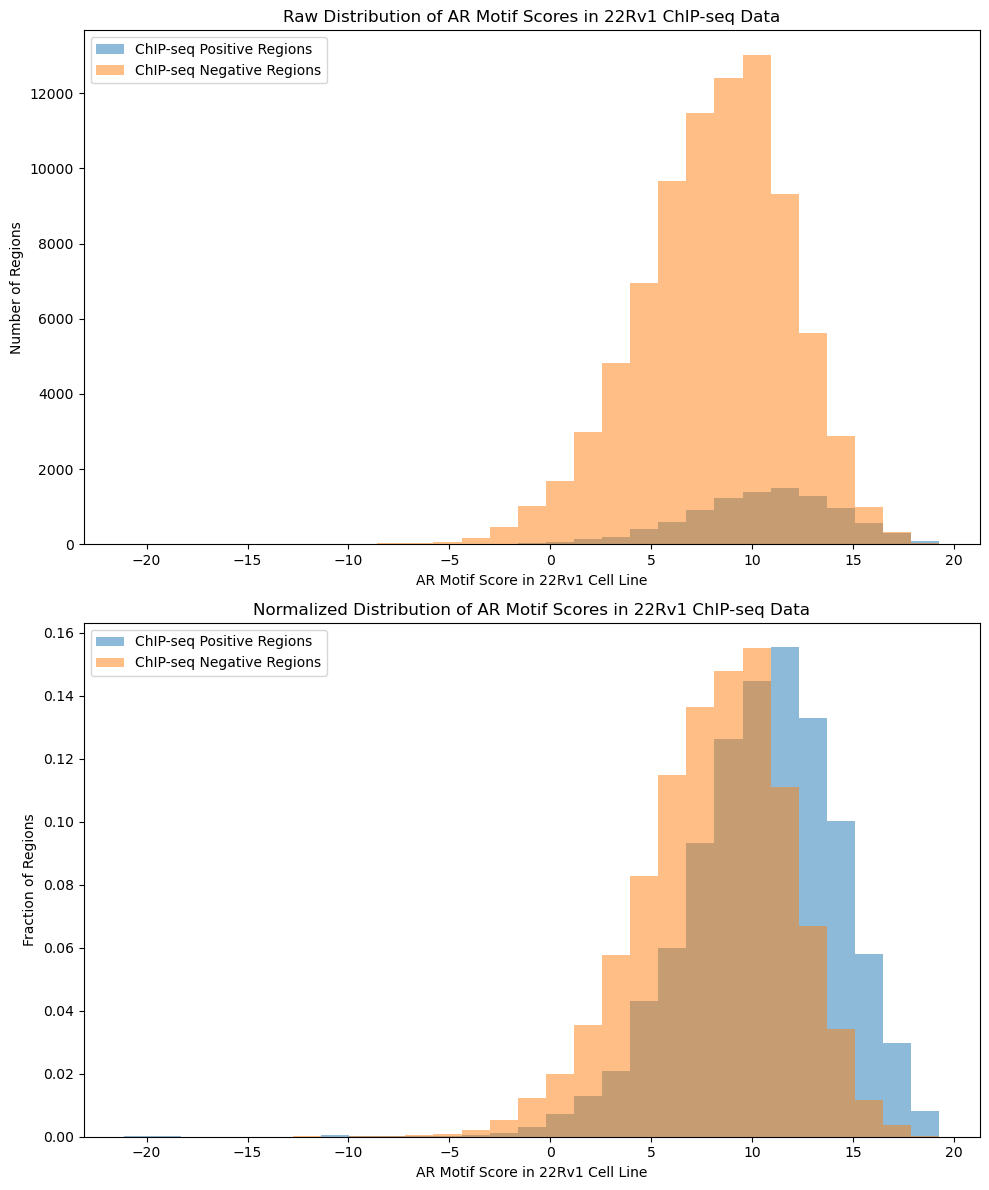

In [2]:

print("Number of NAs in motif_score:", df['motif_score'].isna().sum())

df = df.dropna()
# get distribution of motif scores label 1 vs label 0
df['motif_score'].value_counts()

# Separate the data into two groups based on the label
positive_hits = df[df['label'] == 1]['motif_score']  # ChIP-seq positive regions
negative_hits = df[df['label'] == 0]['motif_score']  # ChIP-seq negative regions

# Remove 'NaN' values and convert to numeric, also remove infinite values
positive_hits = pd.to_numeric(positive_hits[positive_hits != 'NA'], errors='coerce')
negative_hits = pd.to_numeric(negative_hits[negative_hits != 'NA'], errors='coerce')

# Remove infinite values
positive_hits = positive_hits[~np.isinf(positive_hits)]
negative_hits = negative_hits[~np.isinf(negative_hits)]

# Perform a Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(positive_hits, negative_hits, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {statistic}")
print(f"p-value: {p_value}")

# Calculate and print the mean scores for each group
mean_score_positive = positive_hits.mean()
mean_score_negative = negative_hits.mean()

print(f"\nMean motif score for ChIP-seq positive regions: {mean_score_positive:.4f}")
print(f"Mean motif score for ChIP-seq negative regions: {mean_score_negative:.4f}")

import matplotlib.pyplot as plt

# Plot normalized histograms
weights_pos = np.ones_like(positive_hits) / len(positive_hits)
weights_neg = np.ones_like(negative_hits) / len(negative_hits)

# Calculate range for histogram bins
min_val = min(positive_hits.min(), negative_hits.min())
max_val = max(positive_hits.max(), negative_hits.max())
bins = np.linspace(min_val, max_val, 30)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot raw count histogram
ax1.hist(positive_hits, bins=bins, alpha=0.5, label='ChIP-seq Positive Regions')
ax1.hist(negative_hits, bins=bins, alpha=0.5, label='ChIP-seq Negative Regions')
ax1.set_xlabel('AR Motif Score in 22Rv1 Cell Line')
ax1.set_ylabel('Number of Regions')
ax1.set_title('Raw Distribution of AR Motif Scores in 22Rv1 ChIP-seq Data')
ax1.legend()

# Plot normalized histogram
ax2.hist(positive_hits, bins=bins, alpha=0.5, label='ChIP-seq Positive Regions', weights=weights_pos)
ax2.hist(negative_hits, bins=bins, alpha=0.5, label='ChIP-seq Negative Regions', weights=weights_neg)
ax2.set_xlabel('AR Motif Score in 22Rv1 Cell Line')
ax2.set_ylabel('Fraction of Regions')
ax2.set_title('Normalized Distribution of AR Motif Scores in 22Rv1 ChIP-seq Data')
ax2.legend()

plt.tight_layout()
plt.show()

In [3]:
# get the motifs with a score greater than 15
df[df['motif_score'] > 15]['motif_sequence'].value_counts()

threshold = 14

# get true positives false positives, true negatives, false negatives
true_positives = df[(df['label'] == 1) & (df['motif_score'] > threshold)]
false_positives = df[(df['label'] == 0) & (df['motif_score'] > threshold)]
true_negatives = df[(df['label'] == 0) & (df['motif_score'] <= threshold)]
false_negatives = df[(df['label'] == 1) & (df['motif_score'] <= threshold)]

print("true positives: ", len(true_positives))
print("false positives: ", len(false_positives))
print("true negatives: ", len(true_negatives))
print("false negatives: ", len(false_negatives))



true positives:  1633
false positives:  3374
true negatives:  80603
false negatives:  8069


In [4]:
false_positives = false_positives.sort_values(by='motif_score', ascending=False).reset_index()
true_positives = true_positives.sort_values(by='motif_score', ascending=False).reset_index()
true_negatives = true_negatives.sort_values(by='motif_score', ascending=True).reset_index()
false_negatives = false_negatives.sort_values(by='motif_score', ascending=True).reset_index()

true_positives

,index,chr,start,end,count,label,cell_line,motif_sequence,motif_score,motif_start,motif_end,strand
0,8805,chr8,65763883,65764577,3,1,22Rv1,CTGTCTTCTAAATAT,19.270,65763930,65763945,-
1,2676,chr13,84756693,84757233,12,1,22Rv1,AAGAACAGAATGTTC,19.270,84756968,84756983,+
2,6351,chr4,145343223,145344001,13,1,22Rv1,CTGGACATATTTAAA,19.270,145343536,145343551,-
3,151,chr1,54623514,54624222,3,1,22Rv1,CGGGATCACCCAGTC,19.270,54623829,54623844,-
4,1088,chr10,19561596,19562020,2,1,22Rv1,AAGAACAGAATGTTC,19.270,19561914,19561929,+
...,...,...,...,...,...,...,...,...,...,...,...,...
1628,5142,chr3,23112646,23116195,5,1,22Rv1,AAGAACAACCTGTCA,14.016,23114168,23114183,+
1629,4243,chr2,71699990,71700494,7,1,22Rv1,CAGCACACAGTGTTC,14.016,71700347,71700362,+
1630,6297,chr4,133137756,133138886,3,1,22Rv1,AAGGACAGTGTGAAC,14.016,133137868,133137883,+
1631,5867,chr4,27176231,27177429,2,1,22Rv1,AGGTACATGCTGTTT,14.010,27177250,27177265,+


In [5]:
import pysam
def plot_coverage_at_motif(df, idx, bam_file, center_on_motif=True, padding=250, figsize=(10, 4)):
    """
    Plot coverage from BAM file around a motif region or peak boundaries.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing motif information
    idx : int
        Index of the row to plot
    bam_file : str
        Path to the BAM file
    center_on_motif : bool
        If True, plot region around motif with padding
        If False, plot entire peak region
    padding : int
        Number of base pairs to add before and after motif when center_on_motif=True
    figsize : tuple
        Figure size (width, height)
    """
    # Select the specified row
    row = df.iloc[idx]
    
    # Extract parameters from the row
    chrom = row['chr']
    motif_start = row['motif_start']
    motif_end = row['motif_end']
    
    # Set region boundaries based on center_on_motif parameter
    if center_on_motif:
        region_start = motif_start - padding
        region_end = motif_end + padding
    else:
        region_start = row['start'] - padding
        region_end = row['end'] + padding
    
    # Open the BAM file
    bam = pysam.AlignmentFile(bam_file, "rb")
    
    # Compute coverage over the region
    coverage = [0] * (region_end - region_start)
    for pileupcolumn in bam.pileup(chrom, region_start, region_end):
        pos = pileupcolumn.reference_pos
        if region_start <= pos < region_end:
            coverage[pos - region_start] = pileupcolumn.nsegments
    
    bam.close()
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    positions = range(region_start, region_end)
    ax.plot(positions, coverage, color='black', lw=1)
    ax.set_title(f"Coverage: {chrom}:{region_start}-{region_end}")
    ax.set_xlabel("Genomic Position")
    ax.set_ylabel("Coverage")
    
    # Highlight the motif region
    ax.axvspan(motif_start, motif_end, color='orange', alpha=0.3,
               label=f"Motif: {row['motif_sequence']} (Score: {row['motif_score']:.2f})")
    
    # If showing full peak, highlight the peak boundaries
    if not center_on_motif and padding != 0:
        ax.axvline(row['start'], color='red', linestyle='--', alpha=0.5, label='Peak boundaries')
        ax.axvline(row['end'], color='red', linestyle='--', alpha=0.5)
    
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Example usage:
# Plot centered on motif with 250bp padding:
# plot_coverage_at_motif(df, idx, bam_file, center_on_motif=True, padding=250)

# Plot entire peak region:
# plot_coverage_at_motif(df, idx, bam_file, center_on_motif=False)

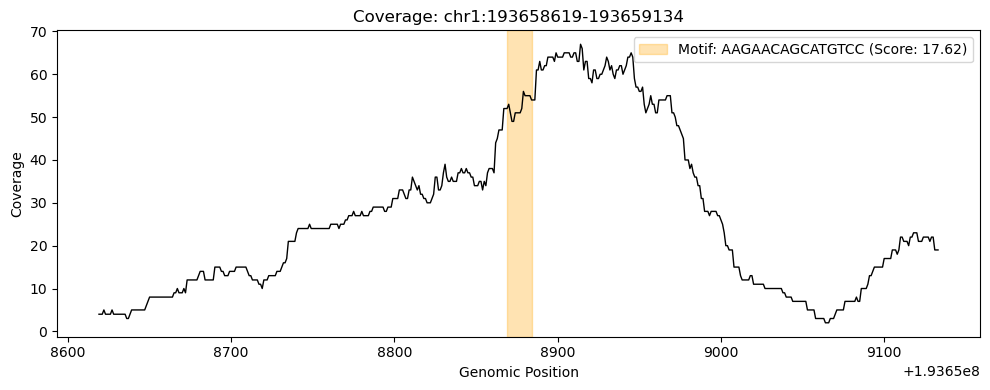

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Coverage: chr1:193658619-193659134'}, xlabel='Genomic Position', ylabel='Coverage'>)

In [6]:
bam_file = '/data1/projects/human_cistrome/aligned_chip_data/merged_cell_lines/22Rv1/bam/22Rv1_merge.sorted.nodup.shifted.bam'
plot_coverage_at_motif(false_positives, 50, bam_file)

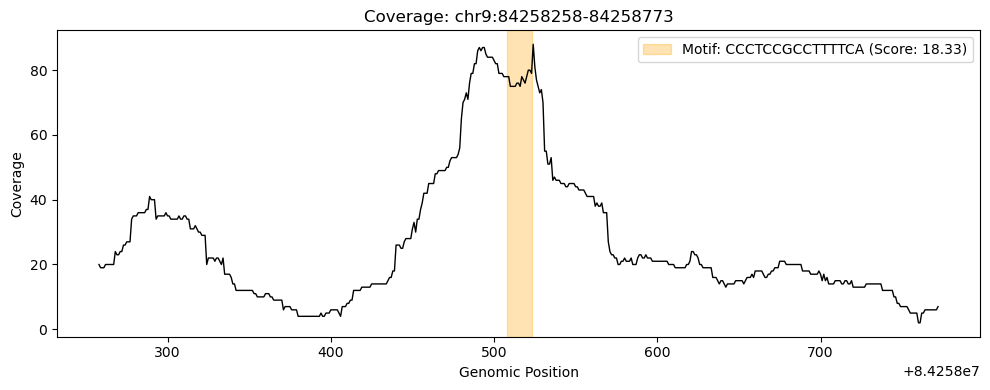

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Coverage: chr9:84258258-84258773'}, xlabel='Genomic Position', ylabel='Coverage'>)

In [7]:
plot_coverage_at_motif(true_positives, 30, bam_file)

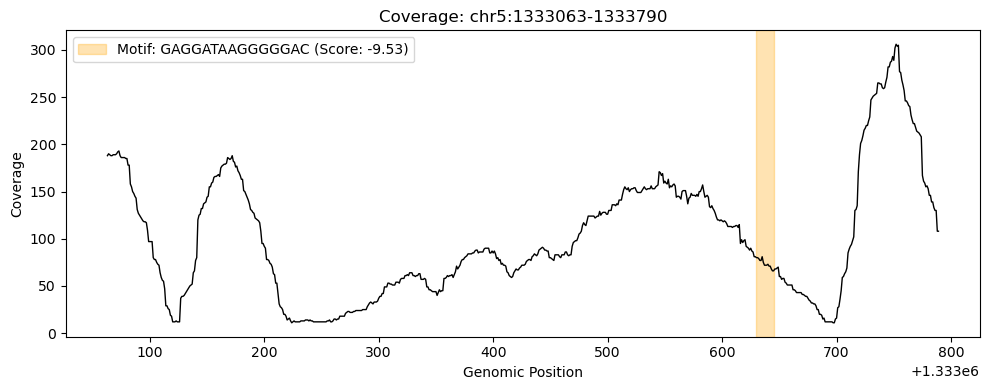

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Coverage: chr5:1333063-1333790'}, xlabel='Genomic Position', ylabel='Coverage'>)

In [8]:
plot_coverage_at_motif(false_negatives, 8, bam_file, center_on_motif=False, padding=0)

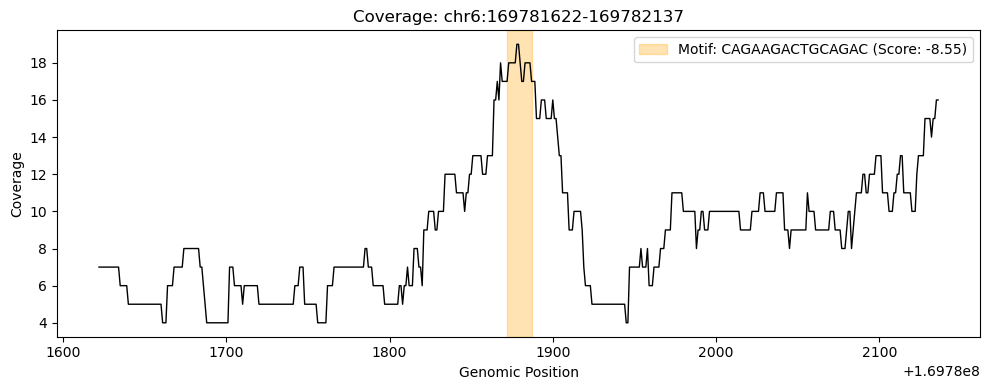

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Coverage: chr6:169781622-169782137'}, xlabel='Genomic Position', ylabel='Coverage'>)

In [9]:
plot_coverage_at_motif(true_negatives, 30, bam_file)

In [10]:
df[df['label'] == 1]['motif_sequence'].value_counts()


motif_sequence
AGGAACAGTCAGCAG    16
AAGAACAGATACTAC    12
GAGTAAACAGACAAC    11
GAGAACTGCTTGAAC     8
GCACTTAGGACCAAG     7
                   ..
TAGCACTTACTGTGT     1
CCATACACTTAGACT     1
GGGAACTGACTGTAT     1
GGGAACTGACTGAGA     1
ACACCTGTAATCCAA     1
Name: count, Length: 9041, dtype: int64

In [11]:
# see what motifs differ most in count between label 1 and label 0
df[df['motif_sequence'] != 'no_motif']['motif_sequence'].value_counts()
df[df['label'] == 1]['motif_sequence'].value_counts()
df[df['label'] == 0]['motif_sequence'].value_counts()

# see what the biggest differences 

motif_sequence
GGGAACTCCCTGACC    629
CCCTTGCGCTTCCCA    338
TGCCTCCTCAAGTGG    109
CCCTTGCGCTTCCCG     77
CAGCACTCTGTGTCT     69
                  ... 
CAAGCCCCAGCCCTC      1
ACTCACATCTCAGGA      1
CTAACTTCGCTTGTC      1
TAGAACACACACACA      1
TGGCACACTGACAGC      1
Name: count, Length: 76713, dtype: int64